# Análise Exploratória 

_Eloisa Moreira de Lira_ [https://eloisalira.github.io/]

Dado de input [AirBnB](http://insideairbnb.com/get-the-data.html) para a **Região de Lyon, Auvergne-Rhone-Alpes, France**

In [80]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
%matplotlib inline  

Importação dos dados

In [81]:
calend=pd.read_csv('C:/Users/Eloisa Lira/Documents/Data_AIRBNB_France/calendar.csv',sep=',' )
listing_row=pd.read_csv('C:/Users/Eloisa Lira/Documents/Data_AIRBNB_France/listings.csv',sep=',' )
neighbourhoods=pd.read_csv('C:/Users/Eloisa Lira/Documents/Data_AIRBNB_France/neighbourhoods.csv',sep=',')
reviews=pd.read_csv('C:/Users/Eloisa Lira/Documents/Data_AIRBNB_France/reviews.csv',sep=',')


In [82]:
#carregamento dos sumarios
sum_list=pd.read_csv('http://data.insideairbnb.com/france/auvergne-rhone-alpes/lyon/2021-12-11/visualisations/listings.csv', sep=',' )


## **Conferindo carregamentos**

In [83]:
sum_list.neighbourhood

0        5e Arrondissement
1       1er Arrondissement
2        3e Arrondissement
3        6e Arrondissement
4       1er Arrondissement
               ...        
9015     9e Arrondissement
9016     2e Arrondissement
9017     9e Arrondissement
9018     3e Arrondissement
9019     3e Arrondissement
Name: neighbourhood, Length: 9020, dtype: object

In [84]:
reviews.head(15)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,56766,139260,2010-11-15,270768,Tones,Great apartment in the heart of Lyon's Old Tow...
1,56766,141497,2010-11-19,19439,Alexis,L'appartement d'Isabelle est formidable : il e...
2,56766,149012,2010-12-05,284867,Marjetka,Very good appartment and kind help of mrs. Isa...
3,56766,163454,2011-01-03,273608,Sam,this is a truly lovely apartment! It is in a g...
4,56766,202067,2011-03-18,359310,Mary,Isabelle was helpful and delightful to meet. W...
5,56766,238341,2011-04-25,362008,Eva,We were able to rent Isabelle Dejeux' own hous...
6,56766,263087,2011-05-14,497433,Anthea,Gorgeous apartment - fabulous location and gre...
7,56766,300243,2011-06-06,89100,Danny,"We had a wonderful stay in the apartment, whic..."
8,56766,360328,2011-07-08,627281,Helene,This flat is very large and comfortable. The ...
9,56766,379904,2011-07-18,530894,Ross,"I want to live in this place ! Amazing stay, s..."


In [85]:
calend.head(10)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,56766,2021-12-11,f,$190.00,$190.00,30,720
1,1187078,2021-12-11,f,$85.00,$85.00,4,240
2,1187078,2021-12-12,f,$85.00,$85.00,4,240
3,1187078,2021-12-13,f,$85.00,$85.00,4,240
4,1187078,2021-12-14,f,$85.00,$85.00,4,240
5,1187078,2021-12-15,f,$85.00,$85.00,4,240
6,1187078,2021-12-16,f,$85.00,$85.00,4,240
7,1187078,2021-12-17,f,$85.00,$85.00,4,240
8,1187078,2021-12-18,f,$85.00,$85.00,4,240
9,1187078,2021-12-19,f,$85.00,$85.00,4,240


**Retirando as primeiras informações sobre os tipos de dados contidos**

In [86]:
listing_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9020 entries, 0 to 9019
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9020 non-null   int64  
 1   listing_url                                   9020 non-null   object 
 2   scrape_id                                     9020 non-null   int64  
 3   last_scraped                                  9020 non-null   object 
 4   name                                          9017 non-null   object 
 5   description                                   8894 non-null   object 
 6   neighborhood_overview                         4983 non-null   object 
 7   picture_url                                   9020 non-null   object 
 8   host_id                                       9020 non-null   int64  
 9   host_url                                      9020 non-null   o

## Contabilizando os valores tipo nan

In [87]:
perc_nan=((listing_row.isna().sum())/len(listing_row))*100
perc_nan.head(50)

id                                0.000000
listing_url                       0.000000
scrape_id                         0.000000
last_scraped                      0.000000
name                              0.033259
description                       1.396896
neighborhood_overview            44.756098
picture_url                       0.000000
host_id                           0.000000
host_url                          0.000000
host_name                         0.044346
host_since                        0.044346
host_location                     0.321508
host_about                       58.669623
host_response_time               58.381375
host_response_rate               58.381375
host_acceptance_rate             53.747228
host_is_superhost                 0.044346
host_thumbnail_url                0.044346
host_picture_url                  0.044346
host_neighbourhood               33.924612
host_listings_count               0.044346
host_total_listings_count         0.044346
host_verifi

**Inserção informação do sumário para o dataframe principal** (_listing_). **Inserindo a informação "vizinhança"**.

In [88]:
listing=listing_row
listing_row['neighbourhood']=sum_list['neighbourhood']


## **Cálculo do percentual de valores nan**

Vamos eliminar as features, onde a porcentagem de nan é maior que 50% com base no dataframe **``perc_nan``**:


>host_about                       58.669623;\
>host_response_time               58.381375;\
>host_response_rate               58.381375;\
>host_acceptance_rate             53.747228;\
>neighbourhood_group_cleansed    100.000000;\
>bathrooms                       100.000000;\
>calendar_updated                100.000000;

In [89]:
listing_ed=listing.drop(columns=['host_about','first_review','host_since','host_response_rate','host_acceptance_rate','neighbourhood_group_cleansed','bathrooms','calendar_updated'])
listing_ed=listing_ed.drop(columns=['listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url','host_name','host_url','host_thumbnail_url','host_picture_url','license'])

In [90]:
listing_ed_s_na=listing_ed.dropna() #retira nan values
listing_ed_s_na.shape

#conferindo datas
perc_nan=((listing_ed_s_na.isna().sum())/len(listing_ed_s_na))*100
perc_nan

id                                              0.0
host_id                                         0.0
host_location                                   0.0
host_response_time                              0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_verifications                              0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood                                   0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
bedrooms    

## **Retirando algumas strings e caracteres especiais.**

Ainda existem outras colunas de informaçao textual a serem removidas da análise.

In [91]:
calend['price'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
calend['adjusted_price'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
listing_ed_s_na['price'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
listing_ed_s_na['bathrooms_text'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
listing_ed_s_na['bathrooms_text'].replace(regex=True, inplace=True, to_replace=r'-', value=r'')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [92]:
listing.bathrooms_text=listing.bathrooms_text.fillna(0)


In [93]:
calend['price']=pd.to_numeric(calend['price'])
calend['adjusted_price']=pd.to_numeric(calend['adjusted_price'])
calend['minimum_nights']=pd.to_numeric(calend['minimum_nights'])
calend['maximum_nights']=pd.to_numeric(calend['maximum_nights'])

In [94]:
calend.describe()


,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,3.292300e+06,3.292300e+06,3.292300e+06,3.292300e+06,3.292300e+06
mean,2.841266e+07,9.757692e+01,9.757541e+01,1.158607e+02,8.637756e+02
std,1.633944e+07,1.759044e+02,1.759062e+02,1.684418e+02,3.685338e+03
min,5.676600e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.359882e+07,4.900000e+01,4.900000e+01,2.000000e+00,3.650000e+02
50%,2.755551e+07,7.000000e+01,7.000000e+01,2.000000e+00,1.125000e+03
75%,4.329638e+07,1.100000e+02,1.100000e+02,3.650000e+02,1.125000e+03
max,5.376972e+07,8.000000e+03,8.000000e+03,1.125000e+03,3.333330e+05


## Perfil dos Anfitriões

In [205]:
listing_ed_s_na.host_is_superhost.value_counts(ascending=False)


f    946
t    566
Name: host_is_superhost, dtype: int64

**Conclusão: 37% são considerados _superhosts_.**

## **Tipos de acomodações disponíveis**

In [180]:

listing_ed_s_na.property_type.value_counts(ascending=False)

Entire rental unit                     982
Private room in rental unit            236
Entire condominium (condo)              75
Entire loft                             46
Private room in condominium (condo)     36
Private room in townhouse               20
Private room in residential home        16
Entire residential home                 16
Entire townhouse                        13
Private room in bed and breakfast       12
Private room in loft                     8
Private room in houseboat                6
Shared room in hostel                    5
Room in bed and breakfast                5
Private room in boat                     4
Private room in guesthouse               4
Entire guesthouse                        3
Entire serviced apartment                3
Entire guest suite                       3
Entire villa                             3
Room in boutique hotel                   3
Room in hotel                            3
Room in hostel                           2
Shared room

In [187]:
listing_ed_s_na.bedrooms.value_counts(ascending=False)

1.0    1021
2.0     320
3.0     120
4.0      33
5.0      12
6.0       4
8.0       1
7.0       1
Name: bedrooms, dtype: int64

## **Distribuições de valores e _outliers_**

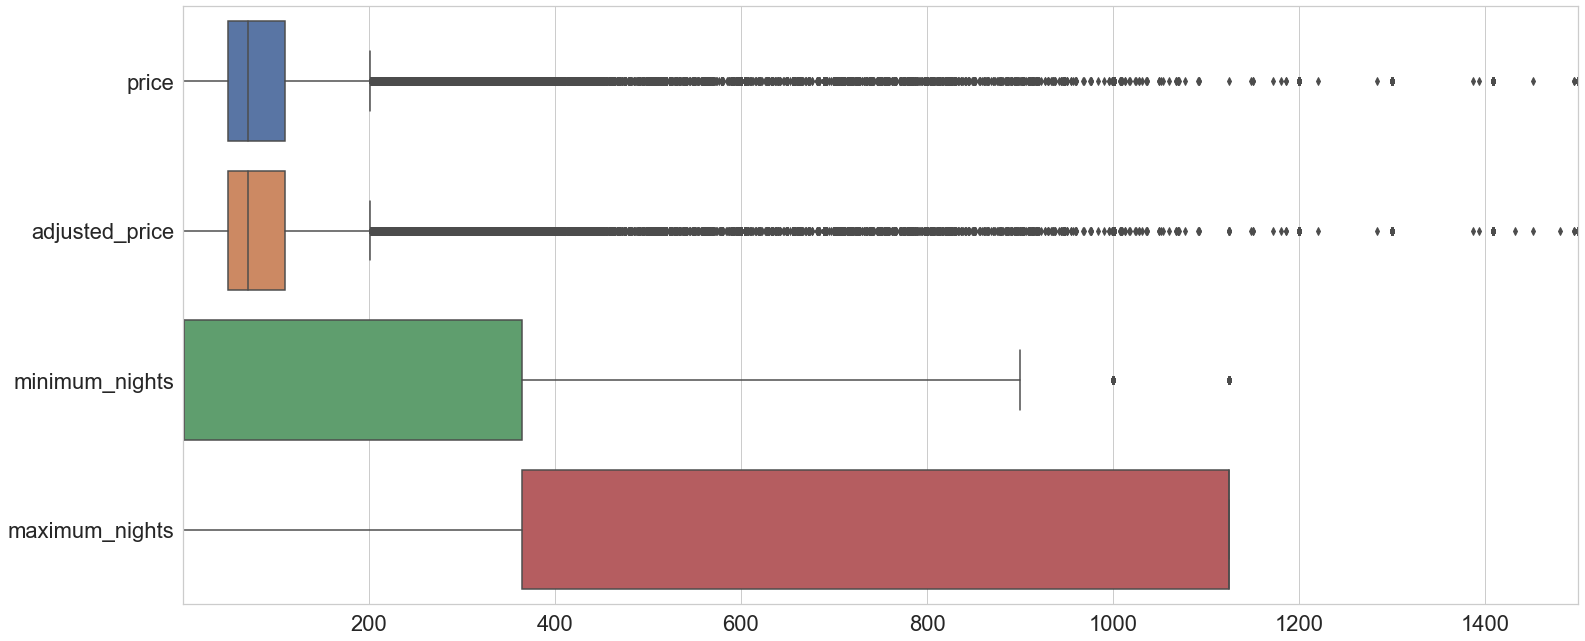

In [147]:
sns.set(style='whitegrid', font_scale = 2)

data=calend.loc[:,['price','adjusted_price','minimum_nights','maximum_nights']]
font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}
  
sns.boxplot(data=data, linewidth=1.5,orient="h")

plt.rcParams["figure.figsize"] = (15,8)
#plt.ylabel(font)
plt.xlim(1,1500)
plt.show()

## Distribuição de Outras Variáveis

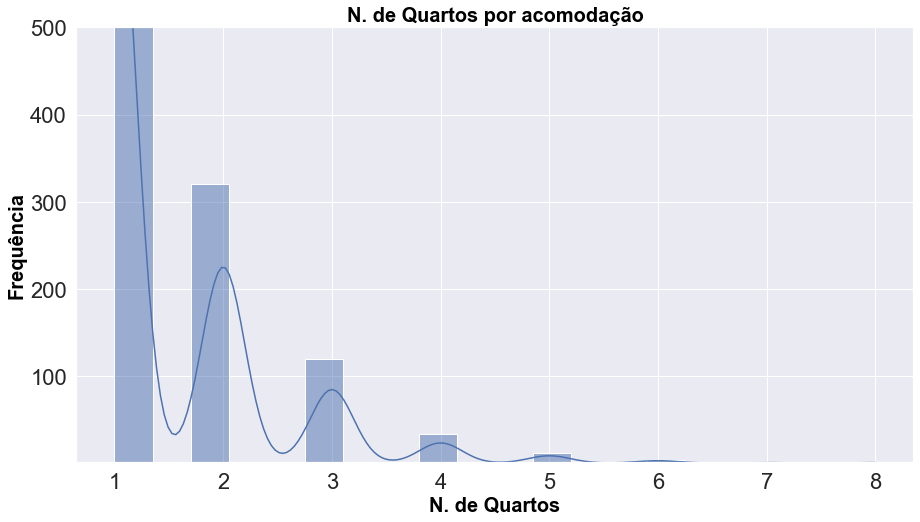

In [195]:
sns.set(style="darkgrid",font_scale = 2)

sns.histplot(data=listing_ed_s_na.bedrooms,bins=20, kde=True)
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}
font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}
plt.title('N. de Quartos por Acomodação',title_font)
plt.xlabel('N. de Quartos',font)
plt.ylabel('Frequência',font)
#plt.figure(figsize = (5,8))
# plt.xlim(1,700)
plt.ylim(1,500)

plt.show()

**A grande maioria das acomodações possuem apenas 1 quarto.**

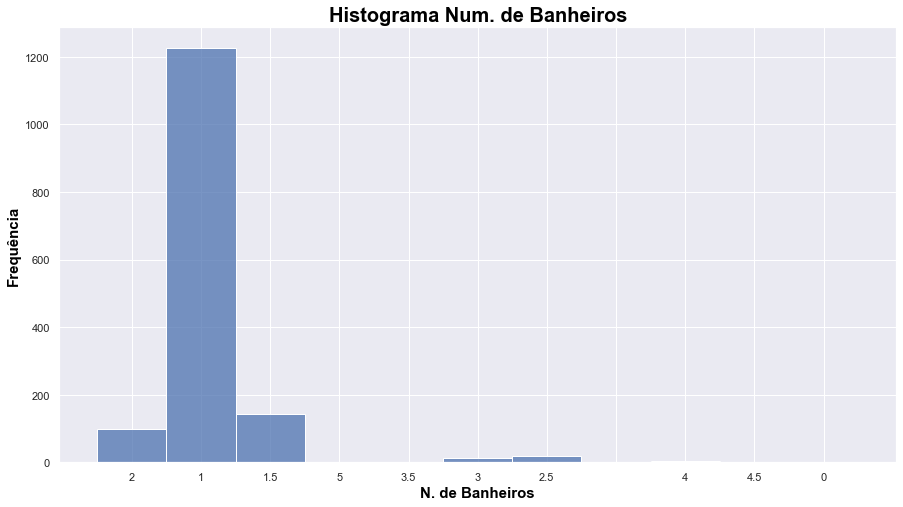

In [212]:
sns.set(style="darkgrid")

title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}
font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'bold'}

sns.histplot(data=listing_ed_s_na['bathrooms_text'],  bins='auto', kde=False)
plt.title('Histograma Num. de Banheiros',title_font)
plt.xlabel('N. de Banheiros',font)
plt.ylabel('Frequência',font)
#plt.xlim(1,10)

plt.show()

**Grande maioria das acomodações oferecem apena 1 banheiro.**

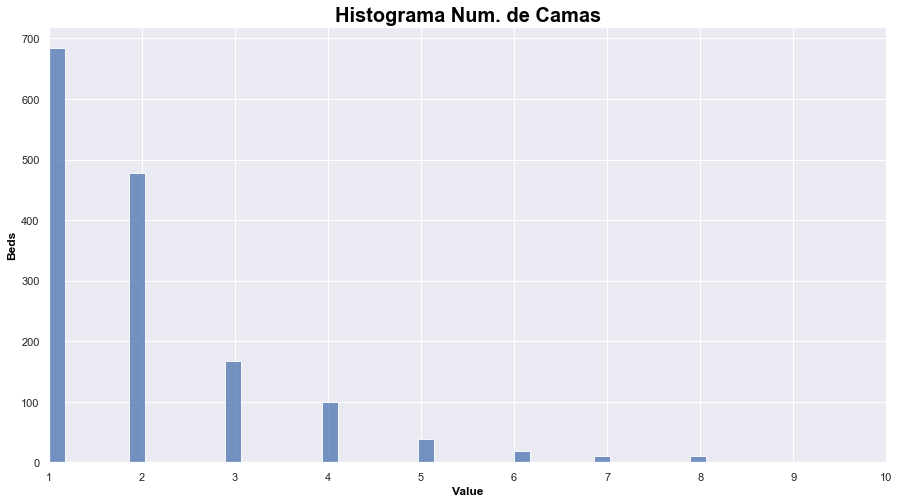

In [213]:
sns.set(style="darkgrid")

title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}
font = {'fontname':'Arial', 'size':'12', 'color':'black', 'weight':'bold'}

sns.histplot(data=listing_ed_s_na['beds'],  bins='auto', kde=False)
plt.xlabel('Value',font)
plt.ylabel('Beds',font)
plt.title('Histograma Num. de Camas',title_font)
plt.xlim(1,10)


plt.show()



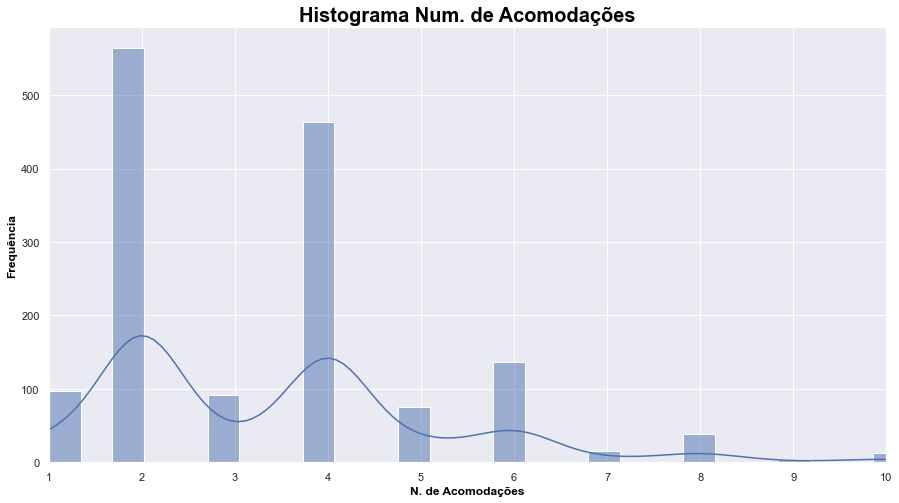

In [214]:
sns.set(style="darkgrid")
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold'}
font = {'fontname':'Arial', 'size':'12', 'color':'black', 'weight':'bold'}

sns.histplot(data=listing_ed_s_na['accommodates'],   bins='auto', kde=True)
plt.title('Histograma Num. de Acomodações',title_font)
plt.xlabel('N. de Acomodações',font)
plt.ylabel('Frequência',font)
plt.xlim(1,10)


plt.show()

**Alguns anuncios oferecem 2, 4 e até mesmo 8 quartos. Curiosamente, o número de banheiros não acompanha esta proporção.**

## Correlações entre variáveis através de um _heatmap_

In [96]:
extract01=listing_ed_s_na.loc[:,['accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']]

<AxesSubplot:>

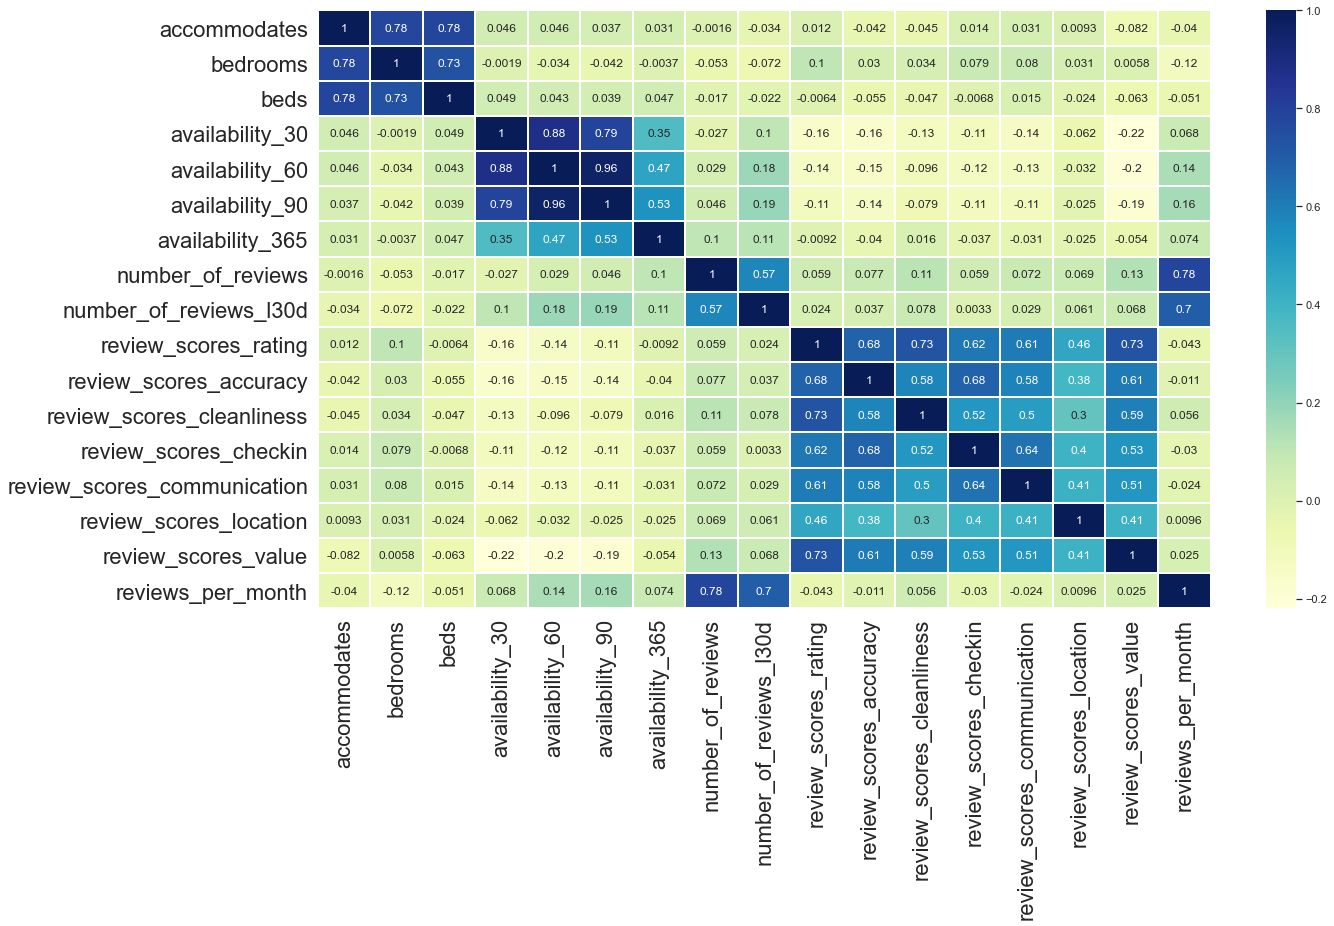

In [152]:
plt.subplots(figsize=(20, 11))
sns.set(font_scale = 1)
sns.heatmap(extract01.corr(), cmap="YlGnBu",linecolor='white', linewidths=1,annot=True)

**Analizando com mais detalhes as variáveis do tipo "review"**

<AxesSubplot:>

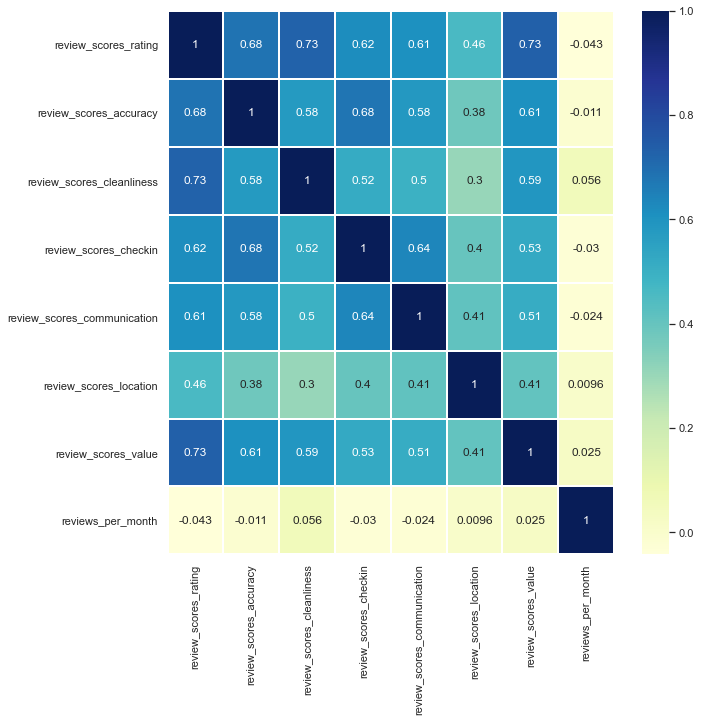

In [168]:
extract01=listing_ed_s_na.loc[:,['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']]
sns.set(font_scale = 1)
plt.subplots(figsize=(10, 10))

sns.heatmap(extract01.corr(), cmap="YlGnBu",linecolor='white', linewidths=1,annot=True)

**Analizando a variável ``review_scores_rating`` percebe-se que ela possui correlação com scores de _value_(valor)  e _cleaness_(limpeza). Outra percepção é que o fator localização não exerce grande influencia na avaliação da acomodação (_score rating_).**


## Visualizando a distribuição dos anúncios

**_Markers_ dos 10 maiores pontos turísticos de Lyon.**

In [216]:
pt_turisticos={0:['Musée des Beaux Arts',45.767213,4.832952],
                1:['Quartier Saint-Jean and Quartier Saint-Georges',45.7574883,4.806949],
                2:['Musée de la Civilisation Gallo-Romaine',45.7604193,4.817775],
                3:['Gourmet Restaurants, Culinary Boutiques, and Cooking Classes',45.7604189,4.8112089],
                4:[' Colline de la Croix-Rousse',45.7796,4.8153113 ],
                5:['Presqu\'ile District',45.7538708,4.829581],
                6:[' Musée des Tissus et des Arts Décoratifs',45.7532337,4.8289946],
                7:['Centre d\'Histoire de la Résistance et de la Déportation',45.7469213,4.8337687],
                8:['Basilique Notre-Dame de Fourviere',45.7622928,4.8204373],
                9:['Primatiale Cathédrale Saint-Jean Baptiste',45.7608008,4.825101]}
ptt=pd.DataFrame(pt_turisticos, index=['nome','latitude','longitude'])

ptt=ptt.transpose()

for _ , ptt in ptt.iterrows():
        folium.Marker(location=[ptt['latitude'], ptt['longitude']],weight=5,popup=ptt['nome'],
                      icon=folium.Icon(color="red", icon="info-sign")).add_to(mapa)     

In [98]:
data=listing_ed_s_na
# create a plain world map
mapa = folium.Map(location=[45.7640, 4.8357])
marker_cluster = folium.plugins.MarkerCluster().add_to(mapa)

for _ , data in data.iterrows():
     folium.Marker(location=[data['latitude'], data['longitude']],weight=5).add_to(marker_cluster)     

#Set the zoom to the maximum possible
mapa.fit_bounds(mapa.get_bounds())

**Concentração de acomodações** (_clusters_) **em relação a proximidade das principais atrações turísticas da Região.**

In [100]:
mapa

In [153]:
print("Contagem descrescente de ocorrências em números absolutos:")
listing_ed_s_na['neighbourhood'].value_counts(ascending=False)

Contagem descrescente de ocorrências em números absolutos:


1er Arrondissement    265
3e Arrondissement     254
7e Arrondissement     204
5e Arrondissement     180
2e Arrondissement     179
4e Arrondissement     142
6e Arrondissement     127
8e Arrondissement      86
9e Arrondissement      75
Name: neighbourhood, dtype: int64

**Uma breve visualização das ocorrências sugere uma maior concentração de acomodações no 1er,3e e 7e Arrondissements em Lyon.**

## Analisando algumas preferências mais citadas nos reviews do AirBnB

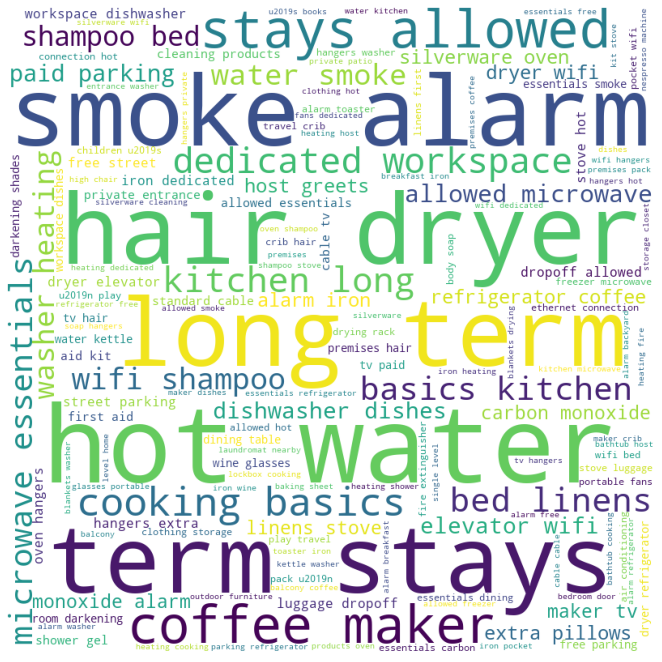

In [102]:

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

#contagem pelo dataframe 
listing_ed_s_na.amenities
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in listing_ed_s_na.amenities:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Através de uma rápida limpeza do dado, foi construída uma nuvem de palavras ``wordclound``.
Aqui estão alguns itens mais citados, de acordo com a opinião dos clientes.**

>**Alarme de Incêndio (em 1 lugar)\
>Secador de cabelo\
>Reserva em longos períodos de tempo\
>Água Quente\
>Itens de Cozinha básica\
>_etc_ ...**

## Location vs Reviews

**Primeiramente: Carregamento dos arquivos GeoJason**

In [103]:
# file name - file is located in the working directory
url='http://data.insideairbnb.com/france/auvergne-rhone-alpes/lyon/2021-12-11/visualisations/neighbourhoods.geojson'

#lyon_geo = f'{url}/lyon-states.json'        #for state level data
lyon_geo = r'neighbourhoods.geojson'


In [104]:
# open the json file - json.load() methods returns a python dictionary
with open(lyon_geo) as communities_file:
    communities_json = json.load(communities_file)

In [105]:
communities_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[4.81088, 45.780992],
       [4.810419, 45.7802],
       [4.809786, 45.779174],
       [4.809267, 45.778315],
       [4.809026, 45.776727],
       [4.809255, 45.775784],
       [4.809486, 45.774982],
       [4.809515, 45.774948],
       [4.809661, 45.774774],
       [4.80969, 45.77474],
       [4.81039, 45.773904],
       [4.812062, 45.772585],
       [4.81307, 45.771118],
       [4.813331, 45.770195],
       [4.813338, 45.770173],
       [4.813359, 45.770111],
       [4.81338, 45.77005],
       [4.813388, 45.770027],
       [4.813523, 45.769786],
       [4.813644, 45.769534],
       [4.813759, 45.769279],
       [4.813876, 45.769025],
       [4.814006, 45.76878],
       [4.814155, 45.768548],
       [4.814334, 45.768337],
       [4.814551, 45.768151],
       [4.814812, 45.767989],
       [4.815109, 45.767845],
       [4.815436, 45.767718],
       [4.815783, 45.

In [106]:
# Carregamento de bairros em arquivo  json 

denominations_json = []
for index in range(len(communities_json['features'])):
    denominations_json.append(communities_json['features'][index]['properties']['neighbourhood'])
    
# print(communities_json['type']['geometry']['coordinate'])
# print(communities_json['features'][0]['geometry']['coordinates']) #coordenadas do ponto

lista=communities_json['features'][0]['geometry']['coordinates']

#print(communities_json['features'][0]['properties']['neighbourhood']) 

#print (len(denominations_json))

In [155]:
#para carregamento de pins
dicionario={
    'neighbourhood': ['1er arrondissement ', '2e arrondissement', '3e arrondissement','4e arrondissement', '5e arrondissement', '6e arrondissement', '7e arrondissement', '8e arrondissement', '9e arrondissement'],
'latitude': [45.770183, 45.745766,45.755593,45.779567,45.756903,45.772173, 45.730914,45.735491,45.775031], 
'longitude': [4.830614, 4.821983, 4.861885, 4.823130,4.817160, 4.853823, 4.833871, 4.869881, 4.804793]
    }


## **Mapas de alguns parâmetros _versus_ localização**

In [158]:
data_arr=pd.DataFrame(dicionario)
# create a plain world map
communities_map = folium.Map(location=[45.7640, 4.8357], zoom_start=11)

for _ , data_arr in data_arr.iterrows():
        folium.Marker(location=[data_arr['latitude'], data_arr['longitude']],weight=5,popup=data_arr['neighbourhood'],
                      icon=folium.Icon(color="orange", icon="info-sign")).add_to(communities_map) 

listing_ed_s_na.price=pd.to_numeric(listing_ed_s_na.price, errors='coerce')
# generate choropleth map 
folium.Choropleth(
    geo_data=lyon_geo,
    data=listing_ed_s_na,
    name='choropleth',    
    columns=['neighbourhood','price'],
    key_on='feature.properties.neighbourhood',
    fill_opacity=0.7,
    line_opacity=0.5,
    fill_color='YlGnBu', 
    legend_name='Price',
    Highlight= True,
    line_color = 'gray',
    show=True,
    overlay=True,
    smooth_factor=0).add_to(communities_map)

# folium.LayerControl(collapsed=False).add_to(communities_map)
communities_map

**Os bairros onde as acomodações são mais caras, estão localizados nos Arrondissements 2e e 6e. As acomodações mais baratas estão locadas nos Arrondissements 8e,5e e 9e.**

In [163]:
# create a plain world map
data_arr2=pd.DataFrame(dicionario)
communities_map2 = folium.Map(location=[45.7640, 4.8357], zoom_start=11)

for _ , data_arr2 in data_arr2.iterrows():
        folium.Marker(location=[data_arr2['latitude'], data_arr2['longitude']],weight=5,popup=data_arr2['neighbourhood'],
                      icon=folium.Icon(color="orange", icon="info-sign")).add_to(communities_map2) 

folium.Choropleth(
    geo_data=lyon_geo,
    data=listing_ed_s_na,
    name='choropleth',    
    columns=['neighbourhood','review_scores_value'],
    key_on='feature.properties.neighbourhood',
    fill_opacity=0.7,
    line_opacity=0.5,
    fill_color='YlGnBu', 
    legend_name='Review Scores Value',
    Highlight= True,
    line_color = 'gray',
    show=True,
    overlay=True,
    smooth_factor=0).add_to(communities_map2)

communities_map2

**Em termos de _score_ de preços: as piores avaliçoes estão nos Arrondissements 5e, 7e e 1er.**

In [164]:
# create a plain world map
data_arr1=pd.DataFrame(dicionario)
communities_map1 = folium.Map(location=[45.7640, 4.8357], zoom_start=11)

for _ , data_arr1 in data_arr1.iterrows():
        folium.Marker(location=[data_arr1['latitude'], data_arr1['longitude']],weight=5,popup=data_arr1['neighbourhood'],
                      icon=folium.Icon(color="orange", icon="info-sign")).add_to(communities_map1) 

folium.Choropleth(
    geo_data=lyon_geo,
    data=listing_ed_s_na,
    name='choropleth',    
    columns=['neighbourhood','review_scores_rating'],
    key_on='feature.properties.neighbourhood',
    fill_opacity=0.7,
    line_opacity=0.5,
    fill_color='YlGnBu', 
    legend_name='Review Scores Rating',
    Highlight= True,
    line_color = 'gray',
    show=True,
    overlay=True,
    smooth_factor=0).add_to(communities_map1)

communities_map1

**Em termos de scores rating: todos os bairros praticamente possuem uma boa avaliação. A excessão estão nos Arrondissements 7e e 5e.**

In [165]:
data_arr3=pd.DataFrame(dicionario)
# create a plain world map
communities_map3 = folium.Map(location=[45.7640, 4.8357], zoom_start=11)

for _ , data_arr3 in data_arr3.iterrows():
        folium.Marker(location=[data_arr3['latitude'], data_arr3['longitude']],weight=5,popup=data_arr3['neighbourhood'],
                      icon=folium.Icon(color="orange", icon="info-sign")).add_to(communities_map3) 

listing_ed_s_na.price=pd.to_numeric(listing_ed_s_na.price, errors='coerce')
# generate choropleth map 
folium.Choropleth(
    geo_data=lyon_geo,
    data=listing_ed_s_na,
    name='choropleth',    
    columns=['neighbourhood','review_scores_location'],
    key_on='feature.properties.neighbourhood',
    fill_opacity=0.7,
    line_opacity=0.5,
    fill_color='YlGnBu', 
    legend_name='Review Scores Location',
    Highlight= True,
    line_color = 'gray',
    show=True,
    overlay=True,
    smooth_factor=0).add_to(communities_map3)

# folium.LayerControl(collapsed=False).add_to(communities_map)
communities_map3

**Em termos de _score_ de localização: os bairros: com boa pontuação 1er,2e,3e,4e,6e e 9e _Arrondissements_.Piores pontuações: 7e, 5e e 8e Arrondissements.**